In [1]:
%reset

In [2]:
organization = [
    "0-verbose",
    "1-medium",
    "2-concise"]

task = 'output/ar'

configurations = [
    "ar_conv_out.pkl",
    "ar_conv_struct_out.pkl",
    "ar_struct_summ_out.pkl",
    "ar_struct_desc_out.pkl",
    "ar_struct_summ_desc_out.pkl",
    "ar_struct_out.pkl"
]

import pickle
outputs = []

for c in configurations:
    output_internal = []
    for o in organization:
        file = (f"{task}/{o}/{c}")
        #open file and append to list
        with open(file, 'rb') as f:
            output_internal.append(pickle.load(f))
    outputs.append(output_internal)

row_total = []

for o in outputs:
    row_int = []
    for c in o:
        row = []
        for d in zip(c['row']):
            row.append(d)
        row_int.append(row)

    row_total.append(row_int)

In [3]:
#import libraries for plotting fancy graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
accuracies = []

for c in row_total:
    accuracy_int = []
    for o in c:
        x = [o_i[0] for o_i in o]
        accuracy_int.append(sum(x)/len(x))
    accuracies.append(accuracy_int)

print(accuracies)

635
635
635
635
635
635
635
635
635
635
635
635
635
635
635
635
635
635
[[0.4141732283464567, 0.4094488188976378, 0.415748031496063], [0.584251968503937, 0.5007874015748032, 0.47716535433070867], [0.5165354330708661, 0.49133858267716535, 0.4409448818897638], [0.49921259842519683, 0.4566929133858268, 0.4582677165354331], [0.47244094488188976, 0.45511811023622045, 0.4330708661417323], [0.5716535433070866, 0.5149606299212598, 0.48661417322834644]]


In [5]:
import numpy as np

configurations = [
    "CONV",
    "CONV+STRUCT",
    "STRUCT+SUMM",
    "STRUCT+DESC",
    "STRUCT+SUMM+DESC",
    "STRUCT"
]

palette = [
    "#F69908",
    "#F55502",
    "#0C0CF5",
    "#0784F5",
    "#A0793A",
    "#75513E"
]

[[0.4141732283464567, 0.4094488188976378, 0.415748031496063], [0.584251968503937, 0.5007874015748032, 0.47716535433070867], [0.5165354330708661, 0.49133858267716535, 0.4409448818897638], [0.49921259842519683, 0.4566929133858268, 0.4582677165354331], [0.47244094488188976, 0.45511811023622045, 0.4330708661417323], [0.5716535433070866, 0.5149606299212598, 0.48661417322834644]]
[0.41312335958005253, 0.5207349081364829, 0.4829396325459318, 0.4713910761154856, 0.45354330708661417, 0.5244094488188976]
[0.0026766506633033008, 0.04593700757408752, 0.03142599379967615, 0.019683289511026412, 0.01611129580390845, 0.03535424302463568]


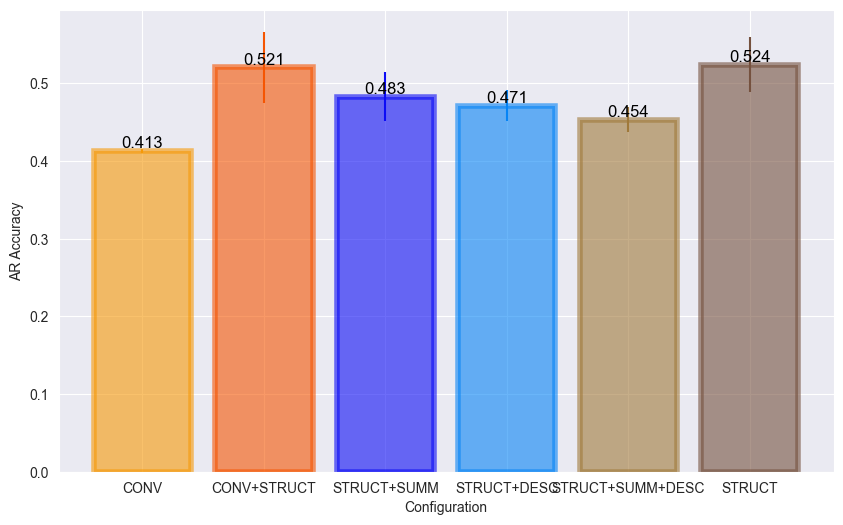

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
#personalize palette

accuracies_plot1 = []

avg_macro_accuracy = [np.mean(x) for x in accuracies]
std_macro_accuracy = [np.std(x) for x in accuracies]

print(accuracies)
print(avg_macro_accuracy)
print(std_macro_accuracy)

min_alpha = 0.3
max_alpha = 1.0

for i in range(len(configurations)):
    alpha = 0.6
    ax.bar(configurations[i], avg_macro_accuracy[i], yerr=std_macro_accuracy[i], color=palette[i], alpha=alpha, linewidth=4, edgecolor = palette[i], ecolor=palette[i])
    #put the values in the middle of the bar, with a little slope
    ax.text(i, avg_macro_accuracy[i], f"{avg_macro_accuracy[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=12, color='black')


ax.set_ylabel('AR Accuracy')
ax.set_xlabel('Configuration')
plt.show()

[[0, 1, 2, 3, 4, 5], [0.3, 1.3, 2.3, 3.3, 4.3, 5.3], [0.6, 1.6, 2.6, 3.6, 4.6, 5.6]]
0


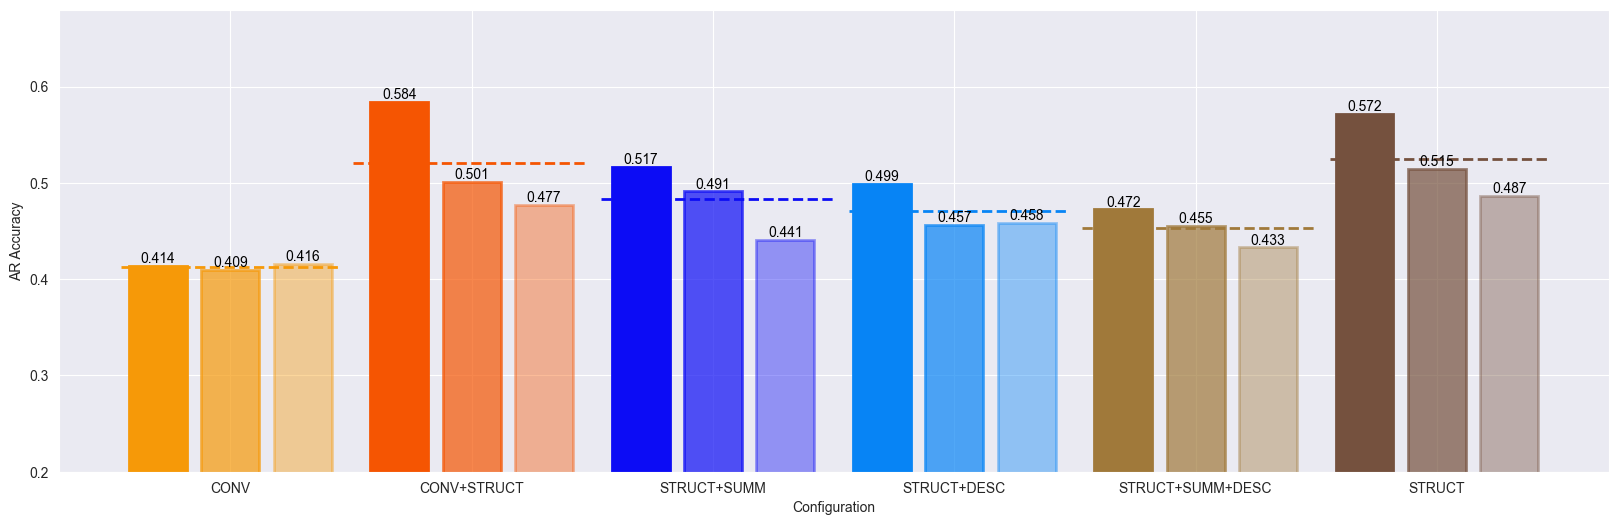

In [12]:
S0 = [acc[0] for acc in accuracies]

S1 = [acc[1] for acc in accuracies]

S2 = [acc[2] for acc in accuracies]

CONV_sp = [S0[0], S1[0], S2[0]]
CONV_STRUCT_sp = [S0[1], S1[1], S2[1]]
SUMM_STRUCT_sp = [S0[2], S1[2], S2[2]]
DESC_STRUCT_sp = [S0[3], S1[3], S2[3]]
SUMM_DESC_STRUCT_sp = [S0[4], S1[4], S2[4]]
STRUCT = [S0[5], S1[5], S2[5]]

import numpy as np
import matplotlib.pyplot as plt
# Sample data
categories = configurations
regions = ['S0', 'S1', 'S2']

#merge S0 S1 and S2 in a unique matrix with dimensions size=(len(categories), len(regions))
values = np.array([S0, S1, S2]).T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Set the positions of the bars on the x-axis
r = np.arange(len(categories))

tot = 20

fig, ax = plt.subplots(figsize=(tot, 6))

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = [x for x in range(len(categories))]
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

rr = [r1, r2, r3]

print(rr)

min_alpha = 0.5

alpha = [1.0, 0.7, 0.4]

for i in range(3):
    minimum_score = min(CONV_sp)
    maximum_score = max(CONV_sp)
    ax.bar(rr[i][0], CONV_sp[i], color=palette[0], alpha=alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[0], ecolor=palette[0])
    ax.text(rr[i][0], CONV_sp[i], f"{CONV_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[0], xmin=0.04, xmax=0.18, color=palette[0], linestyle='--', linewidth=2)
print(rr[0][0])

for i in range(3):
    minimum_score = min(CONV_STRUCT_sp)
    maximum_score = max(CONV_STRUCT_sp)
    ax.bar(rr[i][1], CONV_STRUCT_sp[i], color=palette[1], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[1], ecolor=palette[1])
    ax.text(rr[i][1], CONV_STRUCT_sp[i], f"{CONV_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[1], xmin=0.19, xmax=0.34, color=palette[1], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(SUMM_STRUCT_sp)
    maximum_score = max(SUMM_STRUCT_sp)
    ax.bar(rr[i][2], SUMM_STRUCT_sp[i], color=palette[2], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[2], ecolor=palette[2])
    ax.text(rr[i][2], SUMM_STRUCT_sp[i], f"{SUMM_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[2], xmin=0.35, xmax=0.5, color=palette[2], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(DESC_STRUCT_sp)
    maximum_score = max(DESC_STRUCT_sp)
    ax.bar(rr[i][3], DESC_STRUCT_sp[i], color=palette[3], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[3], ecolor=palette[3])
    ax.text(rr[i][3], DESC_STRUCT_sp[i], f"{DESC_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[3], xmin=0.51, xmax=0.65, color=palette[3], linestyle='--', linewidth=2)


for i in range(3):
    minimum_score = min(SUMM_DESC_STRUCT_sp)
    maximum_score = max(SUMM_DESC_STRUCT_sp)
    ax.bar(rr[i][4], SUMM_DESC_STRUCT_sp[i], color=palette[4], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[4], ecolor=palette[4])
    ax.text(rr[i][4], SUMM_DESC_STRUCT_sp[i], f"{SUMM_DESC_STRUCT_sp[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[4], xmin=0.66, xmax=0.81, color=palette[4], linestyle='--', linewidth=2)

for i in range(3):
    minimum_score = min(STRUCT)
    maximum_score = max(STRUCT)
    ax.bar(rr[i][5], STRUCT[i], color=palette[5], alpha= alpha[i], width=bar_width*0.8, linewidth=2, edgecolor = palette[5], ecolor=palette[5])
    ax.text(rr[i][5], STRUCT[i], f"{STRUCT[i]:.3f}", ha='center', va='bottom', rotation=0, fontsize=10, color='black')

ax.axhline(y=avg_macro_accuracy[5], xmin=0.82, xmax=0.96, color=palette[5], linestyle='--', linewidth=2)
ax.set_ylim([0.2, 0.68])

plt.xticks([r + bar_width*2/2 for r in range(len(configurations))], configurations)
#ax.set_ylabel('STRUCT + SUMM + DESC Score ')
ax.set_ylabel('AR Accuracy')
ax.set_xlabel('Configuration')
plt.show()

#save as pdf

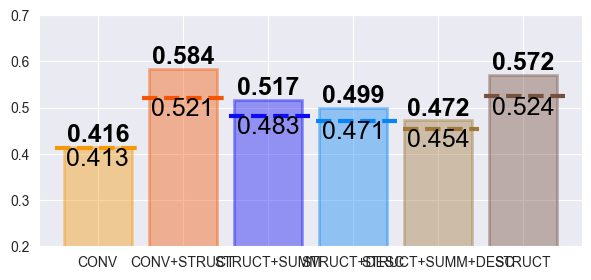

In [8]:
S0 = [acc[0] for acc in accuracies]

S1 = [acc[1] for acc in accuracies]

S2 = [acc[2] for acc in accuracies]

CONV_sp = [S0[0], S1[0], S2[0]]
CONV_STRUCT_sp = [S0[1], S1[1], S2[1]]
SUMM_STRUCT_sp = [S0[2], S1[2], S2[2]]
DESC_STRUCT_sp = [S0[3], S1[3], S2[3]]
SUMM_DESC_STRUCT_sp = [S0[4], S1[4], S2[4]]
STRUCT = [S0[5], S1[5], S2[5]]

import numpy as np
import matplotlib.pyplot as plt
# Sample data
categories = configurations
regions = ['S0', 'S1', 'S2']

#merge S0 S1 and S2 in a unique matrix with dimensions size=(len(categories), len(regions))
values = np.array([S0, S1, S2]).T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Set the positions of the bars on the x-axis
r = np.arange(len(categories))

tot = 7

fig, ax = plt.subplots(figsize=(tot, 3))

# Set the width of the bars
bar_width = 1

# Set the positions of the bars on the x-axis
rr = [x for x in range(len(categories))]

min_alpha = 0.5

alpha = [1.0, 0.7, 0.4]


maximum_score = max(CONV_sp)
ax.bar(rr[0], maximum_score, color=palette[0], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[0], ecolor=palette[0])
ax.text(rr[0], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black', weight='bold')
ax.axhline(y=avg_macro_accuracy[0], xmin=0.03, xmax=0.18, color=palette[0], linestyle='--', linewidth=3)
ax.text(rr[0],avg_macro_accuracy[0], f"{avg_macro_accuracy[0]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')


maximum_score = max(CONV_STRUCT_sp)
ax.bar(rr[1], maximum_score, color=palette[1], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[1], ecolor=palette[1])
ax.text(rr[1], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black',weight='bold')
ax.axhline(y=avg_macro_accuracy[1], xmin=0.19, xmax=0.34, color=palette[1], linestyle='--', linewidth=3)
ax.text(rr[1],avg_macro_accuracy[1], f"{avg_macro_accuracy[1]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')

maximum_score = max(SUMM_STRUCT_sp)
ax.bar(rr[2], maximum_score, color=palette[2], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[2], ecolor=palette[2])
ax.text(rr[2], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black', weight='bold')
ax.axhline(y=avg_macro_accuracy[2], xmin=0.35, xmax=0.5, color=palette[2], linestyle='--', linewidth=3)
ax.text(rr[2],avg_macro_accuracy[2], f"{avg_macro_accuracy[2]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')


maximum_score = max(DESC_STRUCT_sp)
ax.bar(rr[3], maximum_score, color=palette[3], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[3], ecolor=palette[3])
ax.text(rr[3], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black', weight='bold')
ax.axhline(y=avg_macro_accuracy[3], xmin=0.51, xmax=0.66, color=palette[3], linestyle='--', linewidth=3)
ax.text(rr[3],avg_macro_accuracy[3], f"{avg_macro_accuracy[3]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')


maximum_score = max(SUMM_DESC_STRUCT_sp)
ax.bar(rr[4], maximum_score, color=palette[4], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[4], ecolor=palette[4])
ax.text(rr[4], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black', weight='bold')
ax.axhline(y=avg_macro_accuracy[4], xmin=0.67, xmax=0.81, color=palette[4], linestyle='--', linewidth=3)
ax.text(rr[4],avg_macro_accuracy[4], f"{avg_macro_accuracy[4]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')


maximum_score = max(STRUCT)
ax.bar(rr[5], maximum_score, color=palette[5], alpha=alpha[2], width=bar_width*0.8, linewidth=2, edgecolor = palette[5], ecolor=palette[5])
ax.text(rr[5], maximum_score, f"{maximum_score:.3f}", ha='center', va='bottom', rotation=0, fontsize=18, color='black', weight='bold')
ax.axhline(y=avg_macro_accuracy[5], xmin=0.82, xmax=0.97, color=palette[5], linestyle='--', linewidth=3)
ax.text(rr[5],avg_macro_accuracy[5], f"{avg_macro_accuracy[5]:.3f}", ha='center', va='top', rotation=0, fontsize=18, color='black')


ax.set_ylim([0.2, 0.7])
plt.xticks([r for r in range(len(configurations))], configurations)